In [1]:
import torch

In [2]:
!git clone https://github.com/skokalj/RowanDLclassNEA.git

Cloning into 'RowanDLclassNEA'...
remote: Enumerating objects: 1833, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1833 (delta 1), reused 5 (delta 0), pack-reused 1826
Receiving objects: 100% (1833/1833), 57.56 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (3602/3602), done.


In [3]:
%cd RowanDLclassNEA/

/mnt/c/M3/Projects/Rowan/ADV MODELS/RowanDLclassNEA


In [4]:
!ls NEUdata/Cr

Cr_100.bmp  Cr_146.bmp	Cr_191.bmp  Cr_236.bmp	Cr_281.bmp  Cr_55.bmp
Cr_101.bmp  Cr_147.bmp	Cr_192.bmp  Cr_237.bmp	Cr_282.bmp  Cr_56.bmp
Cr_102.bmp  Cr_148.bmp	Cr_193.bmp  Cr_238.bmp	Cr_283.bmp  Cr_57.bmp
Cr_103.bmp  Cr_149.bmp	Cr_194.bmp  Cr_239.bmp	Cr_284.bmp  Cr_58.bmp
Cr_104.bmp  Cr_14.bmp	Cr_195.bmp  Cr_23.bmp	Cr_285.bmp  Cr_59.bmp
Cr_105.bmp  Cr_150.bmp	Cr_196.bmp  Cr_240.bmp	Cr_286.bmp  Cr_5.bmp
Cr_106.bmp  Cr_151.bmp	Cr_197.bmp  Cr_241.bmp	Cr_287.bmp  Cr_60.bmp
Cr_107.bmp  Cr_152.bmp	Cr_198.bmp  Cr_242.bmp	Cr_288.bmp  Cr_61.bmp
Cr_108.bmp  Cr_153.bmp	Cr_199.bmp  Cr_243.bmp	Cr_289.bmp  Cr_62.bmp
Cr_109.bmp  Cr_154.bmp	Cr_19.bmp   Cr_244.bmp	Cr_28.bmp   Cr_63.bmp
Cr_10.bmp   Cr_155.bmp	Cr_1.bmp    Cr_245.bmp	Cr_290.bmp  Cr_64.bmp
Cr_110.bmp  Cr_156.bmp	Cr_200.bmp  Cr_246.bmp	Cr_291.bmp  Cr_65.bmp
Cr_111.bmp  Cr_157.bmp	Cr_201.bmp  Cr_247.bmp	Cr_292.bmp  Cr_66.bmp
Cr_112.bmp  Cr_158.bmp	Cr_202.bmp  Cr_248.bmp	Cr_293.bmp  Cr_67.bmp
Cr_113.bmp  Cr_159.bmp	Cr_203.bmp  Cr_249.bmp	Cr_29

In [5]:
!ls

NEUdata  NEUdata_split	README.md


In [2]:
import os
from PIL import Image
from torchvision import transforms
from torchvision.datasets import DatasetFolder
import cv2
import numpy as np

str ="./RowanDLclassNEA/NEUdata/Cr/Cr_10.bmp"
test_image = cv2.imread(str)
type(test_image)

numpy.ndarray

In [12]:
def load_image(img_path:str):
  test_image = cv2.imread(str)
  test_image = Image.fromarray(test_image)
  return test_image

dset = DatasetFolder(root='./RowanDLclassNEA/NEUdata', loader = load_image, extensions = ('.bmp',))


In [13]:
len(dset)

1800

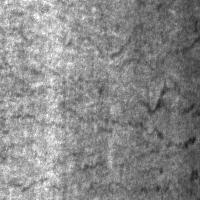

In [14]:
dset[0][0]

In [7]:
data, label = dset[0]
print(type(data))

<class 'numpy.ndarray'>


In [8]:
print(data)

[[[163 163 163]
  [160 160 160]
  [148 148 148]
  ...
  [ 77  77  77]
  [ 71  71  71]
  [ 85  85  85]]

 [[187 187 187]
  [166 166 166]
  [172 172 172]
  ...
  [ 86  86  86]
  [ 67  67  67]
  [ 78  78  78]]

 [[185 185 185]
  [175 175 175]
  [170 170 170]
  ...
  [ 92  92  92]
  [ 78  78  78]
  [ 75  75  75]]

 ...

 [[181 181 181]
  [178 178 178]
  [191 191 191]
  ...
  [ 78  78  78]
  [ 79  79  79]
  [ 79  79  79]]

 [[154 154 154]
  [180 180 180]
  [175 175 175]
  ...
  [ 67  67  67]
  [ 71  71  71]
  [ 65  65  65]]

 [[161 161 161]
  [177 177 177]
  [141 141 141]
  ...
  [ 68  68  68]
  [ 57  57  57]
  [ 53  53  53]]]


#### I need to write transfrom to make it compatible with AlexNet

In [15]:
from torchvision import transforms

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

dset = DatasetFolder(root='./RowanDLclassNEA/NEUdata', loader = load_image, extensions = ('.bmp',), transform = transform)

In [16]:
from torch.utils.data import random_split

train_set, val_set = random_split(
                      dset,
                      [1200, 600])

trainloader = torch.utils.data.DataLoader(
                    train_set,
                    batch_size=16,
                    shuffle=True)

valloader = torch.utils.data.DataLoader(
                    val_set,
                    batch_size=16,
                    shuffle=True)

print(len(trainloader))
# out: 2500
print(len(valloader))
# out: 625

75
38


In [17]:
dd,ll = next(iter(trainloader))

Let's try again: if numpy array returned by load_image is not acceptable, what is?
What is the format of the images we used to build datasets so far?

In [ ]:
def load_image(img_path:str):
        np_img = cv2.imread(img_path) #CV2 to open and convert BMP mages into NUMPY
        
        return ???  #we need Image for the transforms to work correctly

dset = DatasetFolder(root='NEUdata', loader = load_image, extensions = ('.bmp',))


In [ ]:
data, label = dset[0]
print(type(data))
print(data)

In [ ]:
dset = DatasetFolder(root='NEUdata', loader = load_image, extensions = ('.bmp',), transform = transform)
train_set, val_set = random_split(
                      dset,
                      [1200, 600])

trainloader = torch.utils.data.DataLoader(
                    train_set,
                    batch_size=16,
                    shuffle=True)

valloader = torch.utils.data.DataLoader(
                    val_set,
                    batch_size=16,
                    shuffle=True)


In [ ]:
dd,ll = next(iter(trainloader))

In [ ]:
dd.shape

In [ ]:
print(dd)

In [ ]:
print(transform)

In [20]:
import torch.nn as nn
conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, padding = 1, stride = 2)
conv1(torch.randn(2, 3, 224, 224)).shape

torch.Size([2, 6, 112, 112])